In [28]:
import numpy as np
import scipy as sc

import flowio
import flowutils

import seaborn as sns

import data

In [2]:
fd = flowio.FlowData("/media/clint/Data/GitRepo/Data_FlowHIV/100715.fcs")
fd

100715.fcs

# get the compensation matrix

In [3]:
# function compensate.get_spill return the compensation matrix and the name of the markers
spill, markers = flowutils.compensate.get_spill(fd.text['spill'])

Markers

In [8]:
print(len(markers))
print(markers)

13
[u'B515-A', u'R780-A', u'R710-A', u'R660-A', u'V800-A', u'V655-A', u'V585-A', u'V450-A', u'G780-A', u'G710-A', u'G660-A', u'G610-A', u'G560-A']


Matrix

In [9]:
print(spill.shape)

(13, 13)


In [16]:
np.set_printoptions(precision=3, suppress=True)
print(spill[0:3])

[[1.    0.    0.    0.    0.    0.001 0.007 0.    0.    0.    0.    0.001
  0.003]
 [0.    1.    0.071 0.148 0.339 0.01  0.    0.    0.301 0.007 0.012 0.
  0.   ]
 [0.    0.331 1.    0.062 0.121 0.004 0.    0.    0.109 0.1   0.006 0.
  0.   ]]


of course, the diagnal is 1

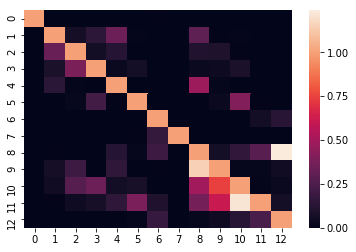

In [29]:
sns.heatmap(spill)

#

In [32]:
fd.channel_count

16

In [30]:
events = np.reshape(fd.events, (-1, fd.channel_count))

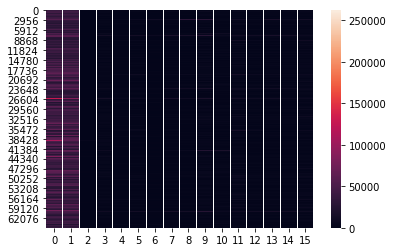

In [31]:
sns.heatmap(events)

# Compensation

To run the compensation, index

In [42]:
fluoro_indices = []

for channel in fd.channels:
    if fd.channels[channel]['PnN'] in markers:
        fluoro_indices.append(int(channel) - 1)
        
fluoro_indices.sort()
print(fluoro_indices)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


compensation

In [24]:
comp_events = flowutils.compensate.compensate(
    events,
    spill,
    fluoro_indices
)

compare the before and after compensation

In [25]:
print('Events shape: ' + str(events.shape))
print('Comp Events shape: ' + str(comp_events.shape))

Events shape: (65016, 16)
Comp Events shape: (65016, 16)


In [26]:
print(events[:1])
print(comp_events[:1])

[[27700.75  27291.75    177.526  1984.485   625.08   1232.101   748.51
   1553.03   1350.256  3175.717  2338.104  2286.171  1758.424  2550.914
   1862.984  1972.485]]
[[27700.75  27291.75    177.526  1979.934   114.513   828.022   290.624
   1050.024   730.768  2363.405  2338.104   424.93    442.585   382.055
   1337.084  1002.129]]


In [45]:
comp_events[:,fluoro_indices].shape

(65016, 13)

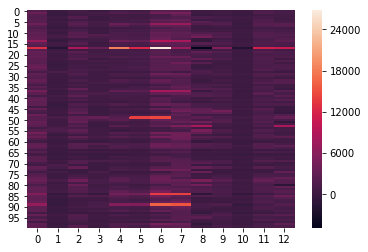

In [47]:
sns.heatmap(comp_events[:100,fluoro_indices])

# Transformation

In [33]:
fluoro_indices = [0, 1]
xform_events = flowutils.transforms.logicle(events, fluoro_indices)

In [34]:
xform_events.shape

(65016, 16)

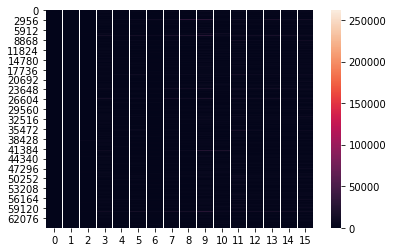

In [35]:
sns.heatmap(xform_events)

In [ ]:
0, 7, 8
sns.heatmap(events[])